<a href="https://colab.research.google.com/github/arifanwar0243/colabs/blob/main/tesis_skripsi/BLDCEquivalent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
#rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('font',**{'family':'serif','serif':['Computer Modern Roman']})
plt.rcParams['text.usetex'] = True

import schemdraw
import schemdraw.elements as elm
schemdraw.config(lw=0.8)

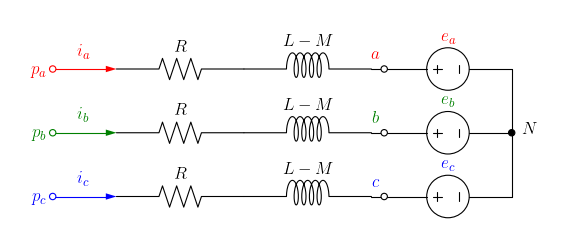

In [ ]:
import schemdraw
import schemdraw.elements as elm
schemdraw.config(lw=0.8)

with schemdraw.Drawing() as d:
    d.push()
    d += elm.Line(arrow='->', color='r').right(d.unit*.5).idot(open=True).label(r'$p_a$', 'left').label(r'$i_a$')
    d += elm.Resistor().label(r'$R$')
    d += elm.Inductor2().label(r'$L-M$')
    d += elm.Line().right(d.unit*.1).dot(open=True).label(r'$a$', color='r', loc='top', ofst=[-0.1, 0.1])
    d += (ea := elm.SourceV().right().reverse().label(r'$e_a$', color='r'))
    d.pop()
    d.move(dx=0, dy=-d.unit*0.5)
    d.push()
    d += elm.Line(arrow='->', color='g').right(d.unit*.5).idot(open=True).label(r'$p_b$', 'left').label(r'$i_b$')
    d += elm.Resistor().label(r'$R$')
    d += elm.Inductor2().label(r'$L-M$')
    d += elm.Line().right(d.unit*.1).dot(open=True).label(r'$b$', color='g', loc='top', ofst=[-0.1, 0.1])
    d += (eb := elm.SourceV().right().reverse().label(r'$e_b$', color='g'))
    d.pop()
    d.move(dx=0, dy=-d.unit*0.5)
    d += elm.Line(arrow='->', color='b').right(d.unit*.5).idot(open=True).label(r'$p_c$', 'left').label(r'$i_c$')
    d += elm.Resistor().label(r'$R$')
    d += elm.Inductor2().label(r'$L-M$')
    d += elm.Line().right(d.unit*.1).dot(open=True).label(r'$c$', color='b', loc='top', ofst=[-0.1, 0.1])
    d += (ec := elm.SourceV().right().reverse().label(r'$e_c$', color=[0,0,1]))

    d += elm.Line().up().dot().to(eb.end)
    d += elm.Label().at(eb.end).label(r'$N$', ofst=[0, -0.5])
    d += elm.Line().up().to(ea.end)
d.save('BLDCEquivalent.pdf')

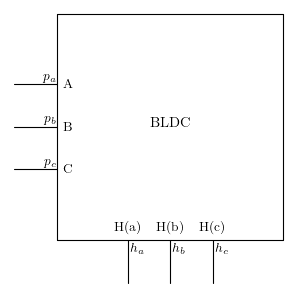

In [ ]:
import schemdraw
import schemdraw.elements as elm
schemdraw.config(lw=0.8)

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    BLDCdef = elm.Ic(pins=[elm.IcPin(name='C', side='left', pin=r'$p_c$'),
                            elm.IcPin(name='B', side='left', pin=r'$p_b$'),
                            elm.IcPin(name='A', side='left', pin=r'$p_a$'),
                            elm.IcPin(name='H(a)', side='bot', pin=r'$h_a$'),
                            elm.IcPin(name='H(b)', side='bot', pin=r'$h_b$'),
                            elm.IcPin(name='H(c)', side='bot', pin=r'$h_c$'),
                            ],
                       edgepadW=1,
                       edgepadH=1,
                       pinspacing=1,
                       leadlen=1,
                       label='BLDC')
    d += (T := BLDCdef)
d.save('BLDCBlock.pdf')

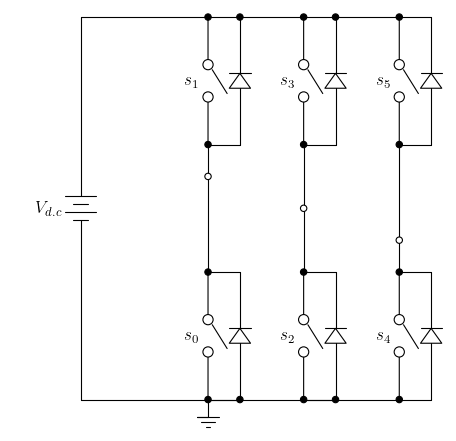

In [ ]:
import schemdraw
import schemdraw.elements as elm
schemdraw.config(lw=0.8)
with schemdraw.Drawing() as d:
    #First Segment
    d += (s1:= elm.Switch().down().label(r'$s_1$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += (d1 := elm.Diode().up()).dot()
    d += elm.Line().left().to(s1.start)
    d.pop()
    d += (CA := elm.Line().down(d.unit*.25).dot(open=True))
    d += elm.Line().down(d.unit*.75)
    d += (s0:= elm.Switch().down().label(r'$s_0$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += elm.Diode().up().idot()
    d += elm.Line().left().to(s0.start)
    d.pop()
    d += (GND := elm.Ground())
    
    #Second Segment
    d += elm.Line().at(d1.end).right(d.unit*.5)
    d += (s3:= elm.Switch().down().label(r'$s_3$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += (d3 := elm.Diode().up()).dot()
    d += elm.Line().left().to(s3.start)
    d.pop()
    d += (CB := elm.Line().down(d.unit*.5).dot(open=True))
    d += elm.Line().down(d.unit*.5)
    d += (s2:= elm.Switch().down().label(r'$s_2$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += elm.Diode().up().idot()
    d += elm.Line().left().to(s2.start)
    d.pop()
    
    #Third Segment
    d += elm.Line().at(d3.end).right(d.unit*.5)
    d += (s5:= elm.Switch().down().label(r'$s_5$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += (d5 := elm.Diode().up())
    d += elm.Line().left().to(s5.start)
    d.pop()
    d += (CC := elm.Line().down(d.unit*.75).dot(open=True))
    d += elm.Line().down(d.unit*.25)
    d += (s4:= elm.Switch().down().label(r'$s_4$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += elm.Diode().up()
    d += elm.Line().left().to(s4.start)
    d.pop()

    d += elm.Line().left().to(GND.start)

    #Source
    d += (Vp := elm.Line().at(s1.start).left())
    d += (Vn := elm.Line().at(s0.end).left())
    d += elm.Battery().to(Vp.end).reverse().label(r'$V_{d.c}$')

    
    

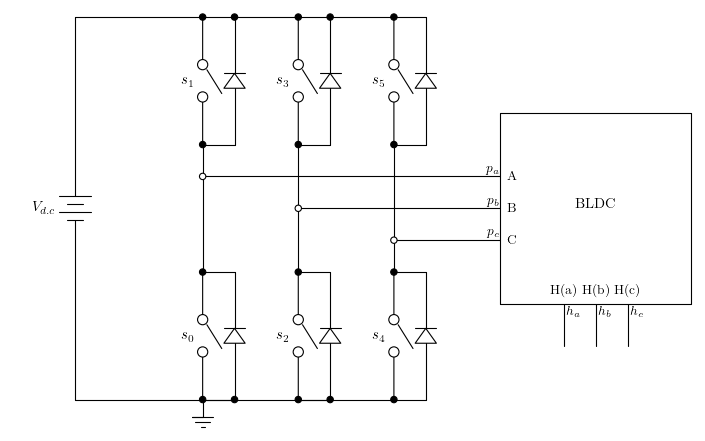

In [ ]:
import schemdraw
import schemdraw.elements as elm
schemdraw.config(lw=0.8)

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    BLDC = elm.Ic(pins=[elm.IcPin(name='C', side='left', pin=r'$p_c$'),
                            elm.IcPin(name='B', side='left', pin=r'$p_b$'),
                            elm.IcPin(name='A', side='left', pin=r'$p_a$'),
                            elm.IcPin(name='H(a)', side='bot', pin=r'$h_a$'),
                            elm.IcPin(name='H(b)', side='bot', pin=r'$h_b$'),
                            elm.IcPin(name='H(c)', side='bot', pin=r'$h_c$'),
                            ],
                       edgepadW=1,
                       edgepadH=1,
                       pinspacing=0.25*d.unit,
                       leadlen=1,
                       label='BLDC')
    #First Segment
    d += (s1:= elm.Switch().down().label(r'$s_1$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += (d1 := elm.Diode().up()).dot()
    d += elm.Line().left().to(s1.start)
    d.pop()
    d += (CA := elm.Line().down(d.unit*.25).dot(open=True))
    d += elm.Line().down(d.unit*.75)
    d += (s0:= elm.Switch().down().label(r'$s_0$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += elm.Diode().up().idot()
    d += elm.Line().left().to(s0.start)
    d.pop()
    d += (GND := elm.Ground())
    
    #Second Segment
    d += elm.Line().at(d1.end).right(d.unit*.5)
    d += (s3:= elm.Switch().down().label(r'$s_3$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += (d3 := elm.Diode().up()).dot()
    d += elm.Line().left().to(s3.start)
    d.pop()
    d += (CB := elm.Line().down(d.unit*.5).dot(open=True))
    d += elm.Line().down(d.unit*.5)
    d += (s2:= elm.Switch().down().label(r'$s_2$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += elm.Diode().up().idot()
    d += elm.Line().left().to(s2.start)
    d.pop()
    
    #Third Segment
    d += elm.Line().at(d3.end).right(d.unit*.5)
    d += (s5:= elm.Switch().down().label(r'$s_5$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += (d5 := elm.Diode().up())
    d += elm.Line().left().to(s5.start)
    d.pop()
    d += (CC := elm.Line().down(d.unit*.75).dot(open=True))
    d += elm.Line().down(d.unit*.25)
    d += (s4:= elm.Switch().down().label(r'$s_4$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.25)
    d += elm.Diode().up()
    d += elm.Line().left().to(s4.start)
    d.pop()

    d += elm.Line().left().to(GND.start)

    #Source
    d += (Vp := elm.Line().at(s1.start).left())
    d += (Vn := elm.Line().at(s0.end).left())
    d += elm.Battery().to(Vp.end).reverse().label(r'$V_{d.c}$')

    #Connecting to BLDC
    d += elm.Line().at(CA.end).right(d.unit*2)
    d += BLDC.anchor('A')
    d += elm.Line().at(CB.end).to(BLDC.B)
    d += elm.Line().at(CC.end).to(BLDC.C)

d.save('BLDCControl.pdf')

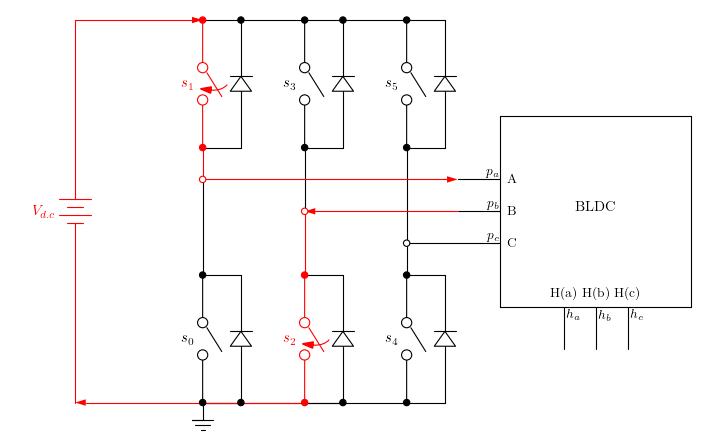

In [ ]:
import schemdraw
import schemdraw.elements as elm
schemdraw.config(lw=0.8)

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    BLDC = elm.Ic(pins=[elm.IcPin(name='C', side='left', pin=r'$p_c$'),
                            elm.IcPin(name='B', side='left', pin=r'$p_b$'),
                            elm.IcPin(name='A', side='left', pin=r'$p_a$'),
                            elm.IcPin(name='H(a)', side='bot', pin=r'$h_a$'),
                            elm.IcPin(name='H(b)', side='bot', pin=r'$h_b$'),
                            elm.IcPin(name='H(c)', side='bot', pin=r'$h_c$'),
                            ],
                       edgepadW=1,
                       edgepadH=1,
                       pinspacing=0.25*d.unit,
                       leadlen=1,
                       label='BLDC')
    #First Segment
    d += (s1:= elm.Switch(action='close').down().label(r'$s_1$').dot().idot().color([1,0,0]))
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += (d1 := elm.Diode().up()).dot()
    d += elm.Line().left().to(s1.start)
    d.pop()
    d += (CA := elm.Line().down(d.unit*.25).dot(open=True).color([1,0,0]))
    d += elm.Line().down(d.unit*.75)
    d += (s0:= elm.Switch().down().label(r'$s_0$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += elm.Diode().up().idot()
    d += elm.Line().left().to(s0.start)
    d.pop()
    d += (GND := elm.Ground())
    
    #Second Segment
    d += elm.Line().at(d1.end).right(d.unit*.5)
    d += (s3:= elm.Switch().down().label(r'$s_3$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += (d3 := elm.Diode().up()).dot()
    d += elm.Line().left().to(s3.start)
    d.pop()
    d += (CB := elm.Line().down(d.unit*.5))
    d += elm.Line().down(d.unit*.5).idot(open=True).color([1,0,0])
    d += (s2:= elm.Switch(action='close').down().label(r'$s_2$').dot().idot().color([1,0,0]))
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += elm.Diode().up().idot()
    d += elm.Line().left().to(s2.start)
    d.pop()
    
    #Third Segment
    d += elm.Line().at(d3.end).right(d.unit*.5)
    d += (s5:= elm.Switch().down().label(r'$s_5$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += (d5 := elm.Diode().up())
    d += elm.Line().left().to(s5.start)
    d.pop()
    d += (CC := elm.Line().down(d.unit*.75).dot(open=True))
    d += elm.Line().down(d.unit*.25)
    d += (s4:= elm.Switch().down().label(r'$s_4$')).dot().idot()
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += elm.Diode().up()
    d += elm.Line().left().to(s4.start)
    d.pop()

    d += elm.Line().left().to(GND.start)

    #Source
    d += (Vp := elm.Line(arrow='<-').at(s1.start).left().color([1,0,0]))
    d += (Vn := elm.Line(arrow='->').at(s0.end).left().color([1,0,0]))
    d += elm.Battery().to(Vp.end).reverse().label(r'$V_{d.c}$').color([1,0,0])

    #Connecting to BLDC
    d += elm.Line(arrow='->').at(CA.end).right(d.unit*2).color([1,0,0])
    d += BLDC.anchor('A')
    d += elm.Line(arrow='<-').at(CB.end).to(BLDC.B).color([1,0,0])
    d += elm.Line().at(CC.end).to(BLDC.C)
    d += elm.Line().at(s2.end).to(s0.end).color('r')

d.save('BLDCPaPb.pdf')

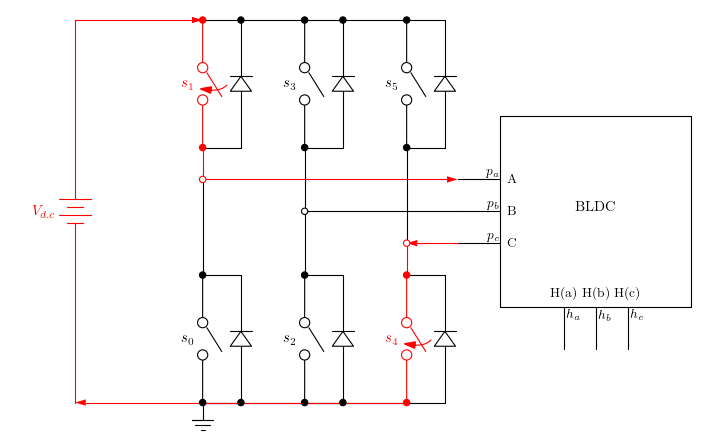

In [ ]:
import schemdraw
import schemdraw.elements as elm
schemdraw.config(lw=0.8)

with schemdraw.Drawing() as d:
    d.config(fontsize=12)
    BLDC = elm.Ic(pins=[elm.IcPin(name='C', side='left', pin=r'$p_c$'),
                            elm.IcPin(name='B', side='left', pin=r'$p_b$'),
                            elm.IcPin(name='A', side='left', pin=r'$p_a$'),
                            elm.IcPin(name='H(a)', side='bot', pin=r'$h_a$'),
                            elm.IcPin(name='H(b)', side='bot', pin=r'$h_b$'),
                            elm.IcPin(name='H(c)', side='bot', pin=r'$h_c$'),
                            ],
                       edgepadW=1,
                       edgepadH=1,
                       pinspacing=0.25*d.unit,
                       leadlen=1,
                       label='BLDC')
    #First Segment
    d += (s1:= elm.Switch(action='close').down().label(r'$s_1$').dot().idot().color([1,0,0]))
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += (d1 := elm.Diode().up().dot())
    d += elm.Line().left().to(s1.start)
    d.pop()
    d += (CA := elm.Line().down(d.unit*.25).dot(open=True).color([1,0,0]))
    d += elm.Line().down(d.unit*.75)
    d += (s0:= elm.Switch().down().label(r'$s_0$').dot().idot())
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += elm.Diode().up().idot()
    d += elm.Line().left().to(s0.start)
    d.pop()
    d += (GND := elm.Ground())
    
    #Second Segment
    d += elm.Line().at(d1.end).right(d.unit*.5)
    d += (s3:= elm.Switch().down().label(r'$s_3$').dot().idot())
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += (d3 := elm.Diode().up().dot())
    d += elm.Line().left().to(s3.start)
    d.pop()
    d += (CB := elm.Line().down(d.unit*.5))
    d += elm.Line().down(d.unit*.5).idot(open=True)
    d += (s2:= elm.Switch().down().label(r'$s_2$').dot().idot())
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += elm.Diode().up().idot()
    d += elm.Line().left().to(s2.start)
    d.pop()
    
    #Third Segment
    d += elm.Line().at(d3.end).right(d.unit*.5)
    d += (s5:= elm.Switch().down().label(r'$s_5$').dot().idot())
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += (d5 := elm.Diode().up())
    d += elm.Line().left().to(s5.start)
    d.pop()
    d += (CC := elm.Line().down(d.unit*.75))
    d += elm.Line().down(d.unit*.25).idot(open=True).color([1,0,0])
    d += (s4:= elm.Switch(action='close').down().label(r'$s_4$').dot().idot().color([1,0,0]))
    d.push()
    d += elm.Line().right(d.unit*.3)
    d += elm.Diode().up()
    d += elm.Line().left().to(s4.start)
    d.pop()

    d += elm.Line().left().to(GND.start)

    #Source
    d += (Vp := elm.Line(arrow='<-').at(s1.start).left().color([1,0,0]))
    d += (Vn := elm.Line(arrow='->').at(s0.end).left().color([1,0,0]))
    d += elm.Battery().to(Vp.end).reverse().label(r'$V_{d.c}$').color([1,0,0])

    #Connecting to BLDC
    d += elm.Line(arrow='->').at(CA.end).right(d.unit*2).color([1,0,0])
    d += BLDC.anchor('A')
    d += elm.Line().at(CB.end).to(BLDC.B)
    d += elm.Line(arrow='<-').at(CC.end).to(BLDC.C).color([1,0,0])
    d += elm.Line().at(s4.end).to(s0.end).color('r')

d.save('BLDCPaPc.pdf')